In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Explanation of Variables

1. sex -(1 = male, 0 = female)
2. cp - chest pain type
3. trestbps - resting blood pressure
4. chol - serum cholestoral
5. fbs - fasting blood sugar
6. restecg - resting electrocardiographic results
7. thalach - maximum heart rate achieved
8. exang - exercise induced angina (1 = yes, 0 = no)
9. oldpeak 
10. slope - the slope of the peak exercise ST segment
     * 0:Upsloping: better heart rate with excercise(uncommon)
     * 1:Flatsloping: minimal change(typical healthy heart)
     * 2:Downsloping: signs of unhealthy heart
11. age
12. ca
13. thal
14. target - have disease or not (1 = yes, 0 = no)

## Load Data 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/francistao1996/Heart-Disease-Prediction/main/heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration 

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

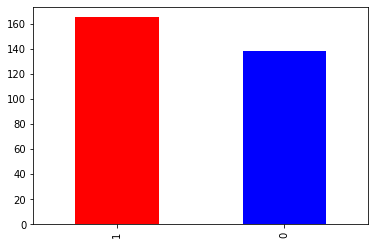

In [5]:
df['target'].value_counts().plot(kind='bar', color=['r','b'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# Check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency VS Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

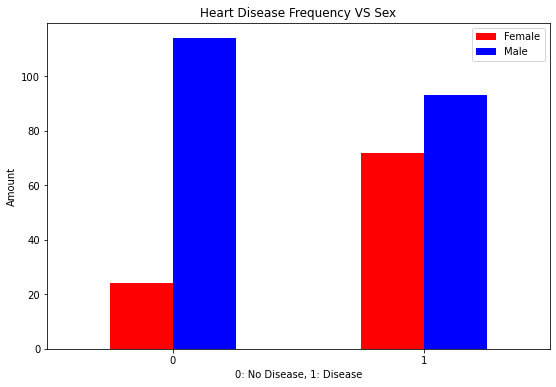

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['r','b'], figsize=[9,6])
plt.title('Heart Disease Frequency VS Sex')
plt.xlabel("0: No Disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

## Age VS Max Heart Rate for Heart Disease

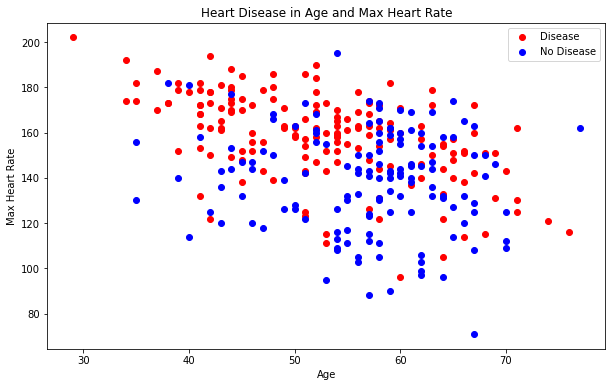

In [12]:
plt.figure(figsize=(10,6))

# Scatterplot with positive cases(Has Disease)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='r')

# Scatterplot with negative cases(No Disease)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='b')

plt.title('Heart Disease in Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

<AxesSubplot:ylabel='Frequency'>

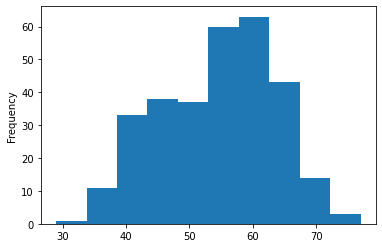

In [13]:
# Check the distribution of Age with histogram
df.age.plot.hist()

## Heart Disease Frequency VS Chest Pain Type(CP)

#### 0: Typical Angina
#### 1: Atypical Angina
#### 2: Non-anginal Pain
#### 3: Asymptomatic

In [14]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

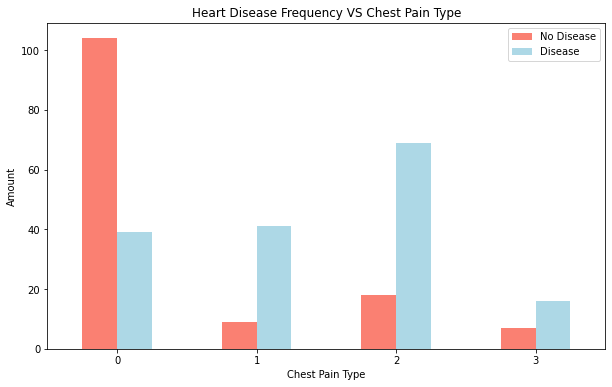

In [15]:
# Visualize the crosstab
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['salmon','lightblue'], figsize=(10,6))

plt.title('Heart Disease Frequency VS Chest Pain Type')
plt.xlabel("Chest Pain Type")
plt.ylabel('Amount')
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [16]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

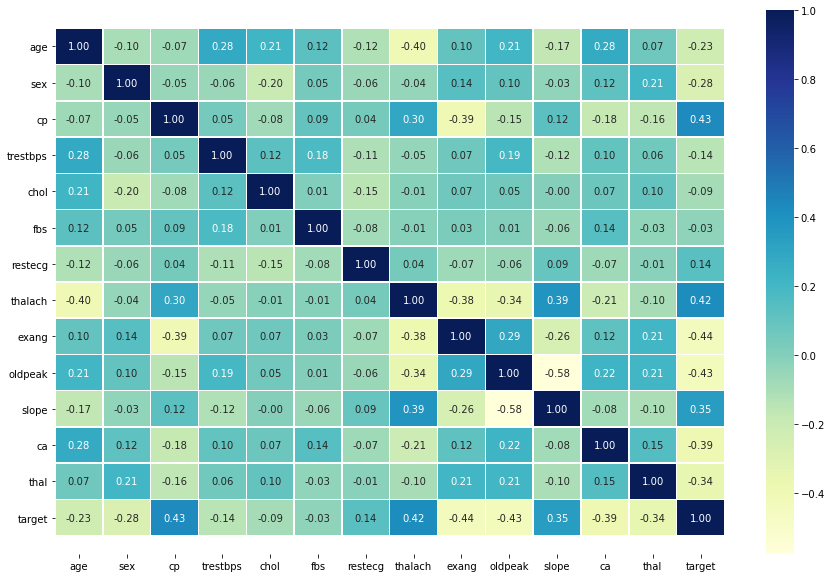

In [17]:
# Visualize correlation by using Seaborn Heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## Modelling 

In [18]:
# Split data into X and Y
x = df.drop('target', axis=1)

y = df['target']
x.shape

(303, 13)

In [19]:
# Split data into train and test sets
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

* Choose the right estimator based on Scikit Machine Learning Map and other options
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

We are going to try 4(or more) different machine learning models
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier
4. Decision Tree Classifier

In [20]:
# Models Dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    """
    # Set random seeds
    np.random.seed(50)
    # Make a dictionary to store model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [21]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\ty199\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934,
 'Decision Tree': 0.819672131147541}

## Compare Models

In [22]:
model_comparison = pd.DataFrame(model_scores, index=["Accuracy"])
model_comparison.T

,Accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.868852
Decision Tree,0.819672


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Decision Tree')])

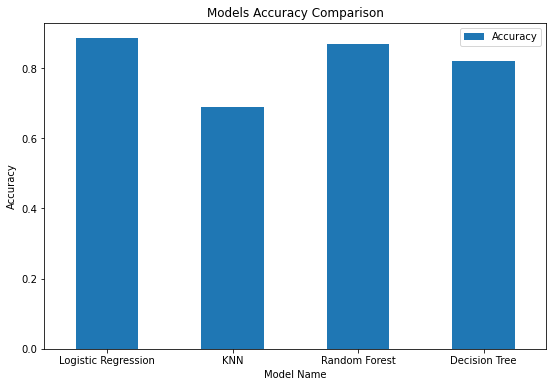

In [23]:
# Visualize the comparison
model_comparison.T.plot(kind='bar', figsize=(9,6))
plt.title('Models Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model Name')
plt.xticks(rotation=0)

Let's see how to improve our models for the next few steps.

Following:
* Hyperpaarameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

## Hyperparameter Tuning

In [24]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


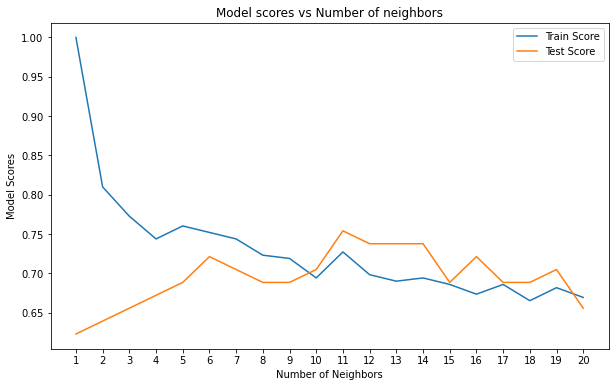

In [27]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend()
plt.xticks(np.arange(1,21,1))
plt.title("Model scores vs Number of neighbors")


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
* DecisionTreeClassifier()

Using RandomizedSearchCV

In [28]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

# Create a hyperparameter grid for DecisionTreeClassifier
dt_grid = {"max_depth": [None, 2, 4,6,8, 10],
           "max_features": np.arange(1,10,1),
           "min_samples_leaf": np.arange(1,20,2),
           "criterion": ["gini", "entropy"]}

Now start tuning

In [29]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
print(model_scores["Logistic Regression"],rs_log_reg.score(x_test,y_test))

0.8852459016393442 0.8852459016393442


Now let's do the same for RandomForest

In [32]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   54.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
# Evaluate the randomized search RandomForestClassifier Model 
# Compare with original one

print(model_scores['Random Forest'],rs_rf.score(x_test, y_test))

0.8688524590163934 0.8688524590163934


Tune DecisionTreeClassifier

In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_dt.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10],
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
                   verbose=True)

In [36]:
rs_dt.best_params_

{'min_samples_leaf': 7, 'max_features': 7, 'max_depth': 8, 'criterion': 'gini'}

In [37]:
# Evaluate the randomized search DecisionTreeClassifier model
# Compare with original DT
print(model_scores['Decision Tree'],rs_dt.score(x_test, y_test))

0.819672131147541 0.8360655737704918


In [38]:
# Update Model Scores
model_scores['Randomized Search Random Forest'] = rs_rf.score(x_test, y_test)
model_scores['Randomized Search Logistic Regression'] = rs_log_reg.score(x_test, y_test)
model_scores['Randomized Search Decision Tree'] = rs_dt.score(x_test, y_test)

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934,
 'Decision Tree': 0.819672131147541,
 'Randomized Search Random Forest': 0.8688524590163934,
 'Randomized Search Logistic Regression': 0.8852459016393442,
 'Randomized Search Decision Tree': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

Improve them again using GridSearchCV

In [40]:
# Different Hyperparameters for LogisticRegression Model
lg_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=lg_reg_grid,
                          cv = 5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# Evaluate the grid search logistic regression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

Let's do GridSearchCV for RandomForestClassifer Model

In [54]:
"""
# Different hyperparameter grid for RandomForestClassifier
rf_grid_gs = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid_gs,
                          cv = 5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(x_train, y_train)
"""

'\n# Different hyperparameter grid for RandomForestClassifier\nrf_grid_gs = {"n_estimators": np.arange(10,1000,50),\n           "max_depth": [None, 3, 5, 10],\n           "min_samples_split": np.arange(2,30,2),\n           "min_samples_leaf": np.arange(1,30,2)}\n\n# Setup grid hyperparameter search for RandomForestClassifier\ngs_rf = GridSearchCV(RandomForestClassifier(),\n                          param_grid=rf_grid_gs,\n                          cv = 5,\n                          verbose=True)\n\n# Fit grid hyperparameter search model\ngs_rf.fit(x_train, y_train)\n'

In [55]:
"""gs_rf.best_params_"""

'gs_rf.best_params_'

In [56]:
"""# Evaluate the Grid Search RandomForest Model
gs_rf.score(x_test, y_test)
"""

'# Evaluate the Grid Search RandomForest Model\ngs_rf.score(x_test, y_test)\n'

## Evaluating tuned machine learning classifier, beyong accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

Make predictions first on Grid Search Logistic Regression Model

In [57]:
y_preds_log = gs_log_reg.predict(x_test)
y_preds_log

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
"""y_preds_rf = gs_rf.predict(x_test)
y_preds_rf
"""

In [44]:
import sklearn as sklearn
sklearn.__version__

'0.23.2'

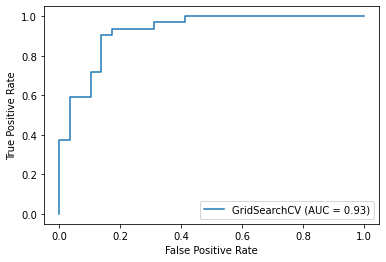

In [48]:
# Plot roc curve for grid search logistic regression model
plot_roc_curve(gs_log_reg, x_test, y_test)

In [ ]:
"""# Plot roc curve for grid search random forest classifier model
plot_roc_curve(gs_rf, x_test, y_test)
"""

In [58]:
# Confusion Matrix for gs logistic regression model
print(confusion_matrix(y_test,y_preds_log))

[[25  4]
 [ 3 29]]


In [59]:
"""# Confusion Matrix for gs random forest classifier model
print(confusion_matrix(y_test,y_preds_rf))
"""

'# Confusion Matrix for gs random forest classifier model\nprint(confusion_matrix(y_test,y_preds_rf))\n'

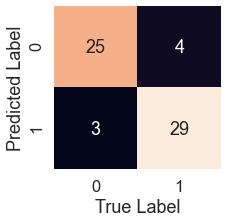

In [60]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds_log)

Now we've got a ROC curve, AUC metric and a confusion matrix,
we'll start the classification report, cross-validation precision, recall and F1-score parts.

In [61]:
print(classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

Calculate precision, recall and F1-score of our model using cross-validation 
'cross_val_score'

In [99]:
# Check best hyperparameters for Grid Search Logistic Regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [98]:
# Check best hyperparameters for Random Search Random Forest
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [64]:
# Create a new classifier with the best parameters we found for Grid Search Logistic Regression
clf = LogisticRegression(C=0.20433597178569418,
                         solver = 'liblinear')

In [100]:
# Create a new classifier with the best parameters we found for Random Search Random Forest
rff = RandomForestClassifier(n_estimators=210,
                             min_samples_split=4,
                             min_samples_leaf=19,
                             max_depth=3)

In [114]:
rff.fit(x_train,y_train)
rff.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [116]:
ypredrf = rff.predict(x_test)
rff.score(x_test,y_test)

0.8688524590163934

In [112]:
cv_acc_rf = cross_val_score(rff,x,y,cv=5, scoring='accuracy')
cv_acc_rf

array([0.83606557, 0.8852459 , 0.81967213, 0.86666667, 0.8       ])

In [105]:
# Cross-validated accuracy
cv_acc_log = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc_log

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [106]:
cv_acc_log = np.mean(cv_acc_log)
cv_acc_log

0.8446994535519124

In [107]:
# Cross-validated precision
cv_precision_log = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision_log

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [108]:
cv_precision_log = np.mean(cv_precision_log)
cv_precision_log

0.8207936507936507

In [109]:
# Cross-validated recall
cv_recall_log = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall_log = np.mean(cv_recall_log)
cv_recall_log

0.9212121212121213

In [110]:
# Cross-validated f1-score
cv_f1_log = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1_log = np.mean(cv_f1_log)
cv_f1_log

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated Classification Metrics'}>

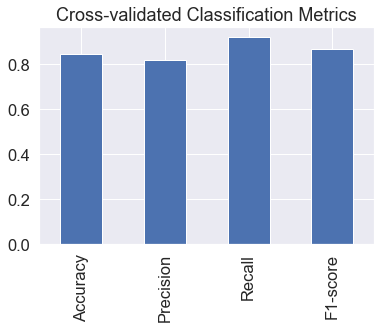

In [111]:
# Visualize cross-validated metrics
cv_metrics_log = pd.DataFrame({"Accuracy": cv_acc_log,
                           "Precision": cv_precision_log,
                           "Recall": cv_recall_log,
                           "F1-score": cv_f1_log},
                         index = [0])

cv_metrics_log.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False)


### Feature Importance

Feature importance is another as asking, "which features contributed 
most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our LogisticRegression model...

In [84]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_



{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [85]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver = 'liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [117]:
clf.score(x_test, y_test)

0.8852459016393442

In [86]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [87]:
# Match coef to columns(variables)
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [89]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


Text(0, 0.5, 'Coefficients')

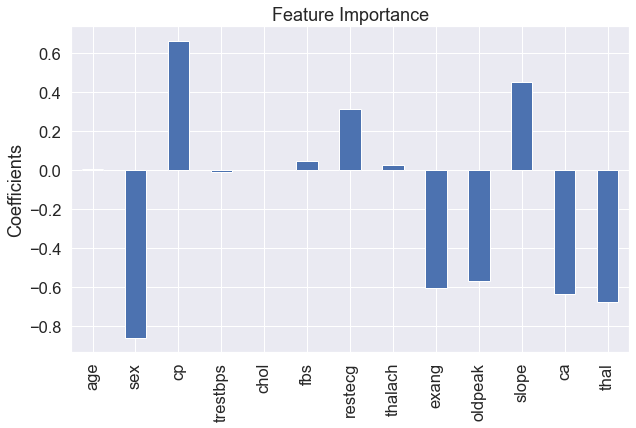

In [96]:
feature_df.T.plot(kind='bar', title='Feature Importance', legend=False, figsize=(10,6))
plt.ylabel('Coefficients')